<a href="https://colab.research.google.com/github/giuliovv/tfest/blob/main/examples/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tfest

In [2]:
# import os
# os.chdir("..")

In [3]:
import base64
import requests

import matplotlib.pyplot as plt
import numpy as np

from scipy import signal
import tfest

In [4]:
def get_values_from_github(u_name, y_name):
  u_get = requests.get("https://raw.githubusercontent.com/giuliovv/bldc_project_work/master/data/tfest/" + u_name + ".csv").text
  y_get = requests.get("https://raw.githubusercontent.com/giuliovv/bldc_project_work/master/data/tfest/" + y_name + ".csv").text
  
  # Last value is empty
  u = np.array(u_get.split("\n")[:-1]).astype(float)
  y = np.array(y_get.split("\n")[:-1]).astype(float)
  
  return u, y

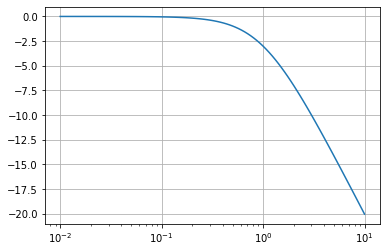

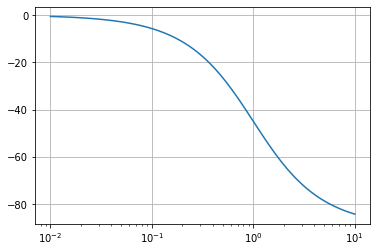

In [5]:
s1 = signal.lti([1], [1, 1])
w, mag, phase = s1.bode()
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid()
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid()
plt.show()

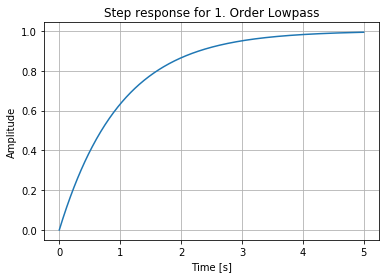

In [6]:
t = np.linspace(0, 5, num=500)
u = np.ones_like(t)
tout, y, x = signal.lsim(s1, u, t)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass')
plt.grid()

In [7]:
u, y = get_values_from_github("sin_sweep", "after_filter")

In [8]:
te = tfest.tfest(u=u, y=y)

In [9]:
te.estimate(nzeros=0, npoles=1, init_value=1, method="fft", time=10)

Optimization terminated successfully.
         Current function value: 25.623163
         Iterations: 32
         Function evaluations: 61


 final_simplex: (array([[1.11699882, 0.57749717, 1.22745919],
       [1.11608453, 0.57707799, 1.22702282],
       [1.11739927, 0.57722975, 1.22678823],
       [1.11716571, 0.5764333 , 1.22767178]]), array([25.6231627 , 25.62317263, 25.62321079, 25.6232171 ]))
           fun: 25.62316270094567
       message: 'Optimization terminated successfully.'
          nfev: 61
           nit: 32
        status: 0
       success: True
             x: array([1.11699882, 0.57749717, 1.22745919])

In [10]:
te.get_transfer_function()

TransferFunctionContinuous(
array([1.93420657]),
array([1.        , 2.12548088]),
dt: None
)

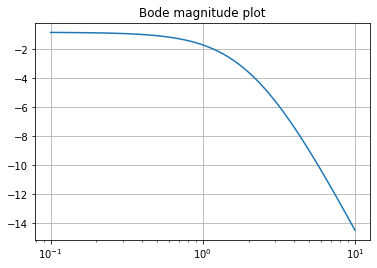

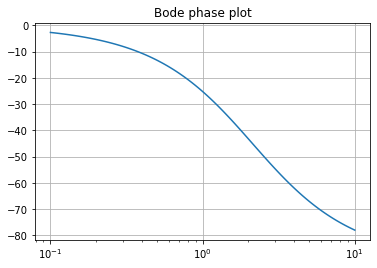

In [11]:
te.plot_bode()

/home/giulio/prog/.virtualenv/ML/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


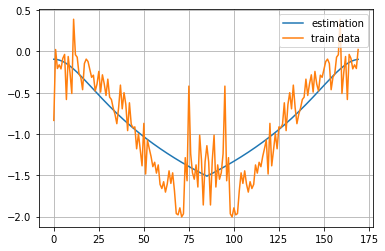

In [12]:
te.plot()